# This code is desgined only for tiger/leopard interaction detection

This code can only detect interaction between two animals at a time.

Somayeh Dodge

Jasper Johnson

Rongxiang Su

In [1]:
#import sys
#!{sys.executable} -m pip install <shapley>

In [5]:
!pip install folium --user
!pip install seaborn --user
!pip install geopandas --user
! pip install datetime --user

    Complete output from command python setup.py egg_info:
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\jrhol\AppData\Local\Temp\pip-install-z2tdkgni\fiona\


# Dependencies and important functions

In [ ]:
import shapely.geometry as geometry
import geopandas as geopandas
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
!pip list

Package            Version 
------------------ --------
arcgis             1.6.1   
asn1crypto         0.24.0  
atomicwrites       1.3.0   
attrs              19.1.0  
backcall           0.1.0   
bleach             3.1.0   
branca             0.4.1   
certifi            2019.3.9
cffi               1.12.2  
cftime             1.0.0b1 
chardet            3.0.4   
colorama           0.4.1   
cryptography       2.6.1   
cycler             0.10.0  
DateTime           4.3     
decorator          4.4.0   
defusedxml         0.5.0   
despatch           0.1.0   
entrypoints        0.3     
et-xmlfile         1.0.1   
fastcache          1.0.2   
folium             0.11.0  
future             0.17.1  
h5py               2.9.0   
html5lib           1.0.1   
idna               2.8     
ipykernel          5.1.0   
ipython            7.4.0   
ipython-genutils   0.2.0   
ipywidgets         7.4.2   
jdcal              1.4     
jedi               0.13.3  
Jinja2             2.10.1  
jsonschema         3

In [2]:
import datetime

def sec_between(d1, d2):
    d1 = datetime.datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).seconds)

In [3]:
import numpy as np
import sympy.geometry as sym
def mid_Point(stp1, stp2):
    mx = min(stp1.x, stp2.x) + math.fabs(stp1.x - stp2.x) /2.0
    my = min(stp1.y, stp2.y) + math.fabs(stp1.y - stp2.y) /2.0
    # print("mx & my ",mx,my)
    return (sym.Point(mx, my,evaluate = False))

In [4]:
class STpoint_modded:

    def __init__(self, x, y, t, t_id):
        self.x = x
        self.y = y
        self.t = t
        self.id= t_id
       # self.seq=seq

    def get_sympy_Point(self):
        return (sym.Point(self.x, self.y))  # gets a sympy point

    def get_STpoint(self):
        return (STpoint(self.x, self.y,self.t))  # gets STpoint

    def get_point(self):
        return (Point(self.x, self.y))  # gets spatial point

    def get_shapely_Point(self):
        return (sh.Point(self.x, self.y))

    def set_sympy_Point(self, pt):  # sympy Point
        self.x = pt.x
        self.y = pt.y

    def set_point(self, pt):  # pointclass Point
        self.x = pt.get_Xcoord
        self.y = pt.get_Ycoord

    def set_x(self, x):
        self.x = x

    def set_y(self, y):
        self.y = y

    def set_time(self, t):
        self.t = t

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    def get_time(self):
        return self.t

    def haversine_distance(self, stp2):
        return move.haversine_distance(self.x, self.y, stp2.x, stp2.y)

    def euclidean_distance(self, stp2):
        return euclidean_distance(self.x, self.y, stp2.x, stp2.y)

    def delta_time(self, stp2, fmt = '%Y-%m-%d %H:%M:%S'): #%Y-%m-%d %H:%M:%S,  %m/%d/%y %H:%M
            deltatime = datetime.datetime.strptime(self.get_time(), fmt) - datetime.datetime.strptime(stp2.get_time(), fmt)
            return math.fabs(deltatime.total_seconds())

In [ ]:
def ppa_ellipse(stp1, stp2, speed):
    dt1 = stp1.delta_time(stp2)/3600  # delta time between the two points
    #print 'dt is: ', dt1,'  speed ',speed
    major = dt1 * speed  # the major axis of the PPA ellipse based on input speed (in time geography this speed is max speed)
    dist = stp1.euclidean_distance(stp2)  # distance between the two points
    #print("major ",major,"dist ",dist)
    #minor = math.sqrt(math.pow(major, 2) - math.pow(dist, 2))  # the minor axis of the PPA ellipse
    minor = (major ** 2 - dist ** 2) ** 0.5
    ctpx,ctpy = mid_Point(stp1, stp2)  # the center point of the PPA ellipse (is a sympy Point)
    dy = stp2.y - stp1.y
    dx = stp2.x - stp1.x
    #print 'dx is {0} and dy is {1}'.format(dx,dy)
    #print 'minor axis is {0} and major axis is {1}'.format(minor,major)
    if dy == 0:
        dy = .1
    if dx == 0:
        dx = .1
    yx_ratio = abs(float(dy) / float(dx))  # absolute value of dy/dx ration
    #print 'dy/dx ratio is:', yx_ratio
    if dx * dy >= 0:
        angle = np.rad2deg(math.atan(yx_ratio))   # the rotation angle of the PPA ellipse in 1st and 3rd quadrants
    else:
        angle = 180 - np.rad2deg(math.atan(yx_ratio))  # the rotation angle of the PPA ellipse in 2nd and 4th quadrants

    #print 'ellipse angle is',angle
    #print("center point ",ctp," major ",major," minor ",minor," angle ",angle)
    #print' x and y ',ctpx,' ',ctpy
    ctp = S_Point(ctpx,ctpy) # changes this line from [0]
    ply = ellipse_polyline(ctp, major, minor, angle )
    ell = ellipse_LinearRing(ply)  # creates the PPA ellipse
    return ell,major # returns a shapely LinearRing


In [ ]:
def euclidean_distance(x1, y1, x2, y2):
    # print("x y",x1,y1)
    # print("x2 y2",x2,y2)
    return math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2))

In [ ]:
def delta_time(self, stp2, fmt = "%Y-%m-%d %H:%M:%S"):
            deltatime = datetime.datetime.strptime(self.get_time(), fmt) - datetime.datetime.strptime(stp2.get_time(), fmt)
            if deltatime ==0:
                return 0.00000000001

In [ ]:
# !pip install geographiclib
from geographiclib.geodesic import Geodesic
Geo = Geodesic.WGS84

def check_dist(a,b,c,d):
  d = Geo.Inverse(a, b,  c, d)
  return(d['s12'])

In [ ]:
def ellipse_LinearRing(ellipse_poly):
    return LinearRing(ellipse_poly)

In [ ]:
def ellipse_polyline(ptc, major, minor,angle, n=100):
    t = np.linspace(0, 2*np.pi, n, endpoint=False) #Return evenly spaced numbers over a specified interval.
    st = np.sin(t)
    ct = np.cos(t)
    x0 = ptc.x
    y0 = ptc.y
    angle = np.deg2rad(angle) # rotation angle of ellipse
    sa = np.sin(angle)
    ca = np.cos(angle)
    p = np.empty((n, 2))
    # divide the major and minor axis by 2.0
    p[:, 0] = x0 + major/2.0 * ca * ct - minor/2.0 * sa * st
    p[:, 1] = y0 + major/2.0 * sa * ct + minor/2.0 * ca * st
    return p

In [ ]:
class ellipse_class:
  check= 'check'
  def __init__(self, el,lat,lon,lastlat,lastlon,tig,lasttig,t1,t2,speed,geom):
    self.el=el
    self.lat=lat
    self.lon=lon
    self.lastlat=lastlat
    self.lastlon= lastlon
    self.tig=tig
    self.lasttig=lasttig
    self.t1=t1
    self.t2=t2
    self.speed=speed  
    self.geom=geom    

    self.idx=[]
    self.intersecting_ellipses = []
    
  #def add_area(self, area):
  #  self.area.append(area)
  #def add_P1_cords(self, P1_cords):
  #  self.P1_cords.append(P1_cords)
  #def add_P2_cords(self, P2_cords):
  #  self.P2_cords.append(P2_cords)
  #def add_C_cords(self, C_cords):
  #  self.C_cords.append(C_cords)
  #def add_intersetion_count(self, intersetion_count):
  #  self.intersetion_count.append(intersetion_count)
  def add_intersecting_ellipses(self, intersecting_ellipses):
    self.intersecting_ellipses.append(intersecting_ellipses)
  def add_idx(self, idx):
    self.idx.append(idx)

In [ ]:
def delta_time_STpoints(stp1, stp2, fmt = "%Y-%m-%d %H:%M:%S"): # '"%Y-%m-%d %H:%M:%S"'  its is also this format, need to track down cases
    deltatime = datetime.datetime.strptime(stp1.get_time(), fmt) - datetime.datetime.strptime(stp2.get_time(), fmt)
    return math.fabs(deltatime.total_seconds())

In [ ]:
#no mod
def ppa_ellipse_jasper(stp1, stp2, est_speed, avg_speed):
  
    #march 10th bug fix:
    if est_speed>avg_speed:
      speed=est_speed
    else:
      speed=avg_speed
    #march 10th bug fix:
    
    dt1 = stp1.delta_time(stp2)/3600  # delta time between the two points
    #print 'dt is: ', dt1,'  speed ',speed
    major = dt1 * speed  # the major axis of the PPA ellipse based on input speed (in time geography this speed is max speed)
    dist = stp1.euclidean_distance(stp2)  # distance between the two points
    #print("major ",major,"dist ",dist)
    #minor = math.sqrt(math.pow(major, 2) - math.pow(dist, 2))  # the minor axis of the PPA ellipse
    minor = (major ** 2 - dist ** 2) ** 0.5
    ctpx,ctpy = mid_Point(stp1, stp2)  # the center point of the PPA ellipse (is a sympy Point)
    dy = stp2.y - stp1.y
    dx = stp2.x - stp1.x
    #print 'dx is {0} and dy is {1}'.format(dx,dy)
    #print 'minor axis is {0} and major axis is {1}'.format(minor,major)
    if dy == 0:
        dy = .1
    if dx == 0:
        dx = .1
    yx_ratio = abs(float(dy) / float(dx))  # absolute value of dy/dx ration
    #print 'dy/dx ratio is:', yx_ratio
    if dx * dy >= 0:
        angle = np.rad2deg(math.atan(yx_ratio))   # the rotation angle of the PPA ellipse in 1st and 3rd quadrants
    else:
        angle = 180 - np.rad2deg(math.atan(yx_ratio))  # the rotation angle of the PPA ellipse in 2nd and 4th quadrants

    #print 'ellipse angle is',angle
    #print("center point ",ctp," major ",major," minor ",minor," angle ",angle)
    #print' x and y ',ctpx,' ',ctpy
    ctp = S_Point(ctpx,ctpy) # changes this line from [0]
    ply = ellipse_polyline(ctp, major, minor, angle )
    ell = ellipse_LinearRing(ply)  # creates the PPA ellipse
    return ell,major # returns a shapely LinearRing

In [ ]:
modified_ellipses_test=False
if modified_ellipses_test==True:
  def ppa_ellipse_jasper(stp1, stp2, est_speed, avg_speed):

      #march 10th bug fix:
      if est_speed>avg_speed:
        avg_speed=est_speed
      #march 10th bug fix:

      dt1 = stp1.delta_time(stp2)/3600  # delta time between the two points
      #print 'dt is: ', dt1,'  speed ',speed
      modder = est_speed - avg_speed

      major = (dt1 * est_speed)  # the major axis of the PPA ellipse based on input speed (in time geography this speed is max speed)
      dist = stp1.euclidean_distance(stp2)  # distance between the two points
      #print("major ",major,"dist ",dist)
      #minor = math.sqrt(math.pow(major, 2) - math.pow(dist, 2))  # the minor axis of the PPA ellipse

      minor =  (((dt1 * avg_speed) ** 2 - dist ** 2) ** 0.5 ) *(1-20*modder)
      ctpx,ctpy = mid_Point(stp1, stp2)  # the center point of the PPA ellipse (is a sympy Point)
      dy = stp2.y - stp1.y
      dx = stp2.x - stp1.x
      #print 'dx is {0} and dy is {1}'.format(dx,dy)
      #print 'minor axis is {0} and major axis is {1}'.format(minor,major)
      if dy == 0:
          dy = .1
      if dx == 0:
          dx = .1
      yx_ratio = abs(float(dy) / float(dx))  # absolute value of dy/dx ration
      #print 'dy/dx ratio is:', yx_ratio
      if dx * dy >= 0:
          angle = np.rad2deg(math.atan(yx_ratio))   # the rotation angle of the PPA ellipse in 1st and 3rd quadrants
      else:
          angle = 180 - np.rad2deg(math.atan(yx_ratio))  # the rotation angle of the PPA ellipse in 2nd and 4th quadrants

      #print 'ellipse angle is',angle
      #print("center point ",ctp," major ",major," minor ",minor," angle ",angle)
      #print' x and y ',ctpx,' ',ctpy
      ctp = S_Point(ctpx,ctpy) # changes this line from [0]
      ply = ellipse_polyline(ctp, major, minor, angle )
      #print(ply)
      ell = ellipse_LinearRing(ply)  # creates the PPA ellipse
      return ell,major # returns a shapely LinearRing

In [ ]:
def timedifcheck(t1,t2):
  d1=pd.to_datetime(t2)
  d2=pd.to_datetime(t1)
  return abs(pd.Timedelta(d2 - d1).total_seconds())


# reading tiger data and/or leopard data


In [ ]:
# #first animal
# df1 = pd.read_csv("./data_input/leopard31898 - leopard31898.csv", header=0, error_bad_lines=False, sep=',')
# #second animal
# df2 = pd.read_csv("./data_input/tiger22901 - tiger22901.csv", header=0, error_bad_lines=False, sep=',')
# # df2 = pd.read_csv("./data_input/tiger22904 - tiger22904.csv", header=0, error_bad_lines=False, sep=',')
# df1['tid'] = 31898
# df2['tid'] = 22901
# df1['Time_LMT'] = pd.to_datetime(df1['Time_LMT'])
# df2['Time_LMT'] = pd.to_datetime(df2['Time_LMT'])

# print (df1.shape[0])
# print (df2.shape[0])

In [ ]:
dfall = pd.read_csv("./data_input/Females20083-20080-formatted-valid-sync.csv", header=0, error_bad_lines=False, sep=',')
dfall.rename(columns={'study_local_timestamp': 'Time_LMT', 'individual_local_identifier': 'tid'}, inplace=True)
df1 = dfall[dfall['tid']==20080]
df2 = dfall[dfall['tid']==20083]
df1['Time_LMT'] = pd.to_datetime(df1['Time_LMT'])
df2['Time_LMT'] = pd.to_datetime(df2['Time_LMT'])

print (df1.shape[0])
print (df2.shape[0])

1797
2750


# make ellipses

chose which individuals we want to generate ellipses for and compare interactions

In [ ]:
gen_ellipses_for1 = df1 #@param ["df1", "df2", "df3"] {type:"raw"}
gen_ellipses_for2 = df2 #@param ["df1", "df2", "df3"] {type:"raw"}

run through dataframes, make ellipses

In [ ]:
from shapely.geometry import Point as S_Point
from shapely.geometry.polygon import LinearRing
from shapely.geometry import Polygon

last_lon=None
last_lat=None
last_tiger=None
import math
multi_el = 1.25

ellipses_list = []
speed_memory = []

latitude_field = 'Latitude'
longitude_field =  'Longitude'
tiger_ID = 'tid'
timefield = 'Time_LMT'
position_identifier = 'position'
Time_format = "%Y-%m-%d %H:%M:%S" #"%m/%d/%y %H:%M"
    
sorted_iter= gen_ellipses_for1.sort_values(timefield)
for a, row in sorted_iter.iterrows():
    p1=None
    p2=None

    ts = row[timefield]
    if row[tiger_ID]== last_tiger:
      p1 = STpoint_modded(row[latitude_field],row[longitude_field], str(ts), row[tiger_ID])
      p2 =  STpoint_modded(last_lat,last_lon,str(last_ts),last_tiger)
      dtime = delta_time_STpoints(p1, p2, "%Y-%m-%d %H:%M:%S")
      fix0div= 0.000000000000000000000000000000001
      est_speed = (((
          (
           euclidean_distance(p1.get_x(),p1.get_y(),p2.get_x(),p2.get_y())
           /(dtime+fix0div)
          )*multi_el)*3600) ) # add a mult (1.25) and an error term (50 m) 
      
      ########SPEED AVERAGING##################
      
      speed_memory.append(est_speed)
      memory_length= 5
      speed_kernel=[1,1,2,5,10]
      speed_memory_subset= speed_memory[-memory_length:]
      if len(speed_memory)<5:
        avg_speed = est_speed
        avg_speed_weighted=est_speed
        avg_speed_kern= est_speed
      else:
        avg_speed= (sum(speed_memory_subset) / (len(speed_memory_subset)))
        speed_memory_subset_np= np.asarray(speed_memory_subset)
        speed_kernel_np=np.asarray(speed_kernel)
        avg_speed_kern_list= speed_kernel_np*speed_memory_subset_np
        kern_sum=sum(speed_kernel)
        avg_speed_kern= sum(avg_speed_kern_list)/sum(speed_kernel)

      el = ppa_ellipse_jasper(p1,p2,est_speed,avg_speed_kern)
     # el = ppa_ellipse(p1,p2,est_speed)
      
      ##MAY 13th: MAKE GEOM TO SPEED UP LATER COMPARISON
      geom=Polygon(el[0]) 

      try:
        inst = ellipse_class(el,row[latitude_field],row[longitude_field],last_lat,last_lon,row[tiger_ID],last_tiger,row[timefield],last_ts,est_speed,geom)
      except:
        print('cant make ellipse class instance')
      ellipses_list.append(inst) 
      p1=None
      p2=None
      inst=None
      est_speed=None
      
    last_lat = row[latitude_field]
    last_lon = row[longitude_field]
    last_tiger = row[tiger_ID]
    last_ts = row[timefield]
print(len(ellipses_list))



last_lon=None
last_lat=None
last_tiger=None
import math
multi_el = 1.25
speed_memory = []

sorted_iter= gen_ellipses_for2.sort_values(timefield)
for a, row in sorted_iter.iterrows():
    p1=None
    p2=None
    ts = row[timefield]
    if row[tiger_ID]== last_tiger:
      #print('making stpoints')      
      p1 = STpoint_modded(row[latitude_field],row[longitude_field], str(ts), row[tiger_ID])
      p2 =  STpoint_modded(last_lat,last_lon,str(last_ts),last_tiger)
      dtime = delta_time_STpoints(p1, p2, "%Y-%m-%d %H:%M:%S")
      fix0div= 0.000000000000000000000000000000001
      est_speed = (((
          (
           euclidean_distance(p1.get_x(),p1.get_y(),p2.get_x(),p2.get_y())
           /(dtime+fix0div)
          )*multi_el)*3600) ) # add a mult (1.25) and an error term (50 m) 
      
      ########SPEED AVERAGING##################
      
      speed_memory.append(est_speed)
      memory_length= 5
      speed_kernel=[1,1,2,5,10]
      speed_memory_subset= speed_memory[-memory_length:]
      if len(speed_memory)<5:
        #print('average broken')
        avg_speed = est_speed
        avg_speed_weighted=est_speed
        avg_speed_kern= est_speed
      else:
        avg_speed= (sum(speed_memory_subset) / (len(speed_memory_subset)))
        speed_memory_subset_np= np.asarray(speed_memory_subset)
        speed_kernel_np=np.asarray(speed_kernel)
        avg_speed_kern_list= speed_kernel_np*speed_memory_subset_np
        kern_sum=sum(speed_kernel)
        avg_speed_kern= sum(avg_speed_kern_list)/sum(speed_kernel)
      ########SPEED AVERAGING##################
      
     # el = ppa_ellipse(p1,p2,avg_speed_kern)
      el = ppa_ellipse_jasper(p1,p2,est_speed,avg_speed_kern)
     # el = ppa_ellipse(p1,p2,est_speed)
      geom=Polygon(el[0]) 
      try:
        inst = ellipse_class(el,row[latitude_field],row[longitude_field],last_lat,last_lon,row[tiger_ID],last_tiger,row[timefield],last_ts,est_speed,geom)
      except:
        print('cant make ellipse class instance')
      ellipses_list.append(inst) 
      p1=None
      p2=None
      inst=None
      est_speed=None

    last_lat = row[latitude_field]
    last_lon = row[longitude_field]
    last_tiger = row[tiger_ID]
    last_ts = row[timefield]
print("total number of ellipses:", len(ellipses_list))

1796
total number of ellipses: 4545


# find interactions

find our spatiotemporal interactions

In [ ]:
from shapely.geometry import Polygon

def get_intersect_pairs(ellipses_list,personid,max_el_timethres,interaction_min_delay):
    interaction_second_delay = interaction_min_delay * 60
    intersection_pairs=[]
    
    count = 0
    for item in ellipses_list: #for loop every ellipse of the only specific person
        if item.tig != personid: continue #only do the following for the specific person id
        #May 15,2020: ignore it if it's too big: 
        count += 1
        if count % 500 == 0:
            print (count,len(ellipses_list))
            
#         if timedifcheck(item.t1,item.t2)>max_el_timethres:
#             continue
        
        poly1= Polygon(item.el[0])  #make polygon from linearring, get centroid
        sub_ellipses_list=[]
        
        # temporal intersect
        for item2 in ellipses_list:
            if (timedifcheck(item.t1,item2.t1) <= interaction_second_delay) and (item2.tig != item.tig):
#                 if timedifcheck(item2.t1,item2.t2)<=max_el_timethres: #May 15,2020: use time difference method to elinimate large ellipses
                sub_ellipses_list.append(item2)
        if len(sub_ellipses_list) == 0:continue

        # spatial intersect
        item_el= item.el[0]
        for others in sub_ellipses_list:
            others_el = others.el[0]
            intersect = (item_el.intersects(others_el) )
            #CONTAINS VS INTERSECT FIX
            poly2= others.geom
            within1 = (poly1.within(poly2) )
            within2 = (poly2.within(poly1) )
            if intersect==True or within1==True or within2==True:
                intersection_pairs.append( (item, others) )
    return intersection_pairs

In [ ]:
def get_spatially_intersect_pairs(ellipses_list,personid,max_el_timethres):
    intersection_pairs=[]
    
    count = 0
    for item in ellipses_list: #for loop every ellipse of the only specific person
        if item.tig != personid: continue #only do the following for the specific person id
        #May 15,2020: ignore it if it's too big: 
        count += 1
        if count % 500 == 0:
            print (count,len(ellipses_list))
            
#         if timedifcheck(item.t1,item.t2)>max_el_timethres:
#             continue
        poly1= Polygon(item.el[0])  #make polygon from linearring, get centroid
        
        sub_ellipses_list=[]
        
        # temporal intersect
        for item2 in ellipses_list:
            if item2.tig != item.tig:
                sub_ellipses_list.append(item2)
        if len(sub_ellipses_list) == 0:continue

        # spatial intersect
        item_el= item.el[0]
        for others in sub_ellipses_list:
            others_el = others.el[0]
            intersect = (item_el.intersects(others_el) )
            #CONTAINS VS INTERSECT FIX
            poly2= others.geom
            within1 = (poly1.within(poly2) )
            within2 = (poly2.within(poly1) )
            if intersect==True or within1==True or within2==True:
                intersection_pairs.append( (item, others) )
    return intersection_pairs

In [ ]:
def get_all_intersect_ellipse(intersection_df):
    person1li, person2li, person1t1, person1t2, person2t1, person2t2= [],[],[],[],[],[]
    person1lon1,person1lat1,person1lon2,person1lat2 = [],[],[],[]
    person2lon1,person2lat1,person2lon2,person2lat2 = [],[],[],[]
    for item in intersection_df:
            person1t1.append(item[0].t1)
            person1t2.append(item[0].t2)
            person2t1.append(item[1].t1)
            person2t2.append(item[1].t2)
            person1li.append(item[0].tig)
            person2li.append(item[1].tig)
            person1lon1.append(item[0].lon)
            person1lat1.append(item[0].lat)
            person1lon2.append(item[0].lastlon)
            person1lat2.append(item[0].lastlat)
            person2lon1.append(item[1].lon)
            person2lat1.append(item[1].lat)
            person2lon2.append(item[1].lastlon)
            person2lat2.append(item[1].lastlat)
    df_all = pd.DataFrame(list(zip(person1li, person2li,person1t2, person1t1, person2t2,person2t1,person1lon1,person1lat1,person1lon2,person1lat2,person2lon1,person2lat1,person2lon2,person2lat2)), columns = ['Person1','Person2','Person1_t_start','Person1_t_end','Person2_t_start','Person2_t_end','Person1_endlon','Person1_endlat','Person1_startlon','Person1_startlat','Person2_endlon','Person2_endlat','Person2_startlon','Person2_startlat'])
    return df_all

In [ ]:
# I decide not to eliminate large ellipses here in this code but in the 06_tiger_interaction_frequency_histogram because this will allow us to keep as much as possbile potential interactions
MAX_EL_TIMETHRE = 1000000000000000 #eliminate large ellipses, in seconds, when we set a very large value like here it means we don't want to eliminate ellipses
MINUTE_DELAY = 180#@param {type:"slider"} , set a time lag in minute
#['30','60','180','360','1440','2880','5760','10080','20160','30240','40320','50400']

In [ ]:
%%time
all_intersection_pairs1 = []

# **** use a small dataframe to go through the loop will speed up the function of "get_intersect_pairs" *****
# tiger2 = df2[tiger_ID].unique().tolist()[0]
tiger1 = df1[tiger_ID].unique().tolist()[0]

all_intersection_pairs1 = get_intersect_pairs(ellipses_list,tiger1,MAX_EL_TIMETHRE,MINUTE_DELAY)


500 4545
1000 4545
1500 4545
CPU times: user 1min 57s, sys: 125 ms, total: 1min 57s
Wall time: 1min 57s


In [ ]:
df_allinter_ellipse = get_all_intersect_ellipse(all_intersection_pairs1)
print (df_allinter_ellipse.shape[0])

11


In [ ]:
df_allinter_ellipse

,Person1,Person2,Person1_t_start,Person1_t_end,Person2_t_start,Person2_t_end,Person1_endlon,Person1_endlat,Person1_startlon,Person1_startlat,Person2_endlon,Person2_endlat,Person2_startlon,Person2_startlat
0,20080,20083,2016-07-16 09:00:00,2016-07-23 03:00:00,2016-07-23 02:01:00,2016-07-23 03:00:00,99.01032,15.55017,99.03963,15.54360,99.06460,15.50131,99.06480,15.50126
1,20080,20083,2016-09-04 00:00:00,2016-09-04 06:01:00,2016-09-04 05:00:00,2016-09-04 06:00:00,99.06595,15.50962,99.05950,15.51251,99.05936,15.49932,99.03920,15.49292
2,20080,20083,2016-09-04 06:01:00,2016-09-04 07:03:00,2016-09-04 06:00:00,2016-09-04 07:01:00,99.06094,15.50541,99.06595,15.50962,99.06902,15.50022,99.05936,15.49932
3,20080,20083,2016-09-04 10:00:00,2016-09-04 11:00:00,2016-09-04 09:00:00,2016-09-04 11:01:00,99.06351,15.50876,99.05963,15.50864,99.06408,15.50826,99.06629,15.50284
4,20080,20083,2016-09-04 11:00:00,2016-09-04 12:00:00,2016-09-04 11:01:00,2016-09-04 12:00:00,99.06310,15.50790,99.06351,15.50876,99.05542,15.50921,99.06408,15.50826
5,20080,20083,2016-09-04 18:00:00,2016-09-04 19:00:00,2016-09-04 16:00:00,2016-09-04 19:01:00,99.06330,15.50875,99.06328,15.50877,99.03244,15.53001,99.05555,15.51506
6,20080,20083,2016-09-04 21:00:00,2016-09-04 22:00:00,2016-09-04 21:02:00,2016-09-04 22:00:00,99.06329,15.50878,99.06331,15.50884,99.06265,15.50500,99.05878,15.51475
7,20080,20083,2016-09-04 22:00:00,2016-09-04 23:00:00,2016-09-04 22:00:00,2016-09-04 23:00:00,99.06329,15.50883,99.06329,15.50878,99.06267,15.50502,99.06265,15.50500
8,20080,20083,2016-09-05 01:00:00,2016-09-05 02:00:00,2016-09-05 00:00:00,2016-09-05 02:00:00,99.06372,15.50798,99.06332,15.50887,99.06386,15.50574,99.06261,15.50505
9,20080,20083,2016-09-05 06:00:00,2016-09-05 07:00:00,2016-09-05 06:00:00,2016-09-05 07:00:00,99.06349,15.50706,99.06393,15.50848,99.06346,15.50655,99.06321,15.50673


In [ ]:
# df_allinter_ellipse.to_csv("data_generated/tiger_interaction_pairs_"+str(MINUTE_DELAY)+"min.csv",sep=',',index=False)
# df_allinter_ellipse.to_csv("data_generated/leopard31898tiger22901_interaction_"+str(MINUTE_DELAY)+"min.csv",sep=',',index=False)
# df_allinter_ellipse.to_csv("data_generated/leopard31898tiger22904_interaction_"+str(MINUTE_DELAY)+"min.csv",sep=',',index=False)
df_allinter_ellipse.to_csv("data_generated/tiger20080_20083_"+str(MINUTE_DELAY)+"min.csv",sep=',',index=False)


In [ ]:
# Spatially intersecting only

In [ ]:
remove_large_ellipse = 180 # parameter in minute: remove large ellipses longer than 3 hours
def compute_frequency_excludinglarge_ellipse(df1):
    df1['Person1_t_start'] = pd.to_datetime(df1['Person1_t_start'])
    df1['Person1_t_end'] = pd.to_datetime(df1['Person1_t_end'])
    df1['Person2_t_start'] = pd.to_datetime(df1['Person2_t_start'])
    df1['Person2_t_end'] = pd.to_datetime(df1['Person2_t_end'])
    
    df1['timediff1'] = df1['Person1_t_end'] - df1['Person1_t_start']
    df1['timediff1'] = df1['timediff1'].dt.total_seconds()/60
    df1['timediff2'] = df1['Person2_t_end'] - df1['Person2_t_start']
    df1['timediff2'] = df1['timediff2'].dt.total_seconds()/60
    
    df1_new =df1[(df1['timediff1']<=remove_large_ellipse)&(df1['timediff2']<=remove_large_ellipse)]
    return df1_new

In [ ]:
%%time
all_intersection_pairs2 = []
tiger1 = df1[tiger_ID].unique().tolist()[0]
# tiger2 = df2[tiger_ID].unique().tolist()[0]
all_intersection_pairs2 = get_spatially_intersect_pairs(ellipses_list,tiger1,MAX_EL_TIMETHRE)
# all_intersection_pairs2 = get_spatially_intersect_pairs(ellipses_list,tiger2,MAX_EL_TIMETHRE)

500 16359
1000 16359
1500 16359
2000 16359
2500 16359
3000 16359
3500 16359
4000 16359
4500 16359
5000 16359
5500 16359
6000 16359
6500 16359
7000 16359
CPU times: user 7min 30s, sys: 559 ms, total: 7min 30s
Wall time: 7min 31s


In [ ]:
df_allinter_ellipse2 = get_all_intersect_ellipse(all_intersection_pairs2)
print (df_allinter_ellipse2.shape[0])

127618


In [ ]:
df_allinter_ellipse2.to_csv("data_generated/leopard31898_tiger22901_spatiallyIntersectedOnly.csv",sep=',',index=False)
# df_allinter_ellipse2.to_csv("data_generated/leopard31898_tiger22904_spatiallyIntersectedOnly.csv",sep=',',index=False)
# df_allinter_ellipse2.to_csv("data_generated/tiger20080_tiger20083_spatiallyIntersectedOnly.csv",sep=',',index=False)
# df_allinter_ellipse2.to_csv("data_generated/tiger22901_tiger22904_spatiallyIntersectedOnly.csv",sep=',',index=False)


In [ ]:
newdata1 = compute_frequency_excludinglarge_ellipse(df_allinter_ellipse2)
print (newdata1.shape[0])

41410


In [ ]:
df_allinter_ellipse2['test'] = df_allinter_ellipse2['Person1'] - df_allinter_ellipse2['Person2']
df_allinter_ellipse2[df_allinter_ellipse2['test']==0]

,Person1,Person2,Person1_t_start,Person1_t_end,Person2_t_start,Person2_t_end,Person1_endlon,Person1_endlat,Person1_startlon,Person1_startlat,Person2_endlon,Person2_endlat,Person2_startlon,Person2_startlat,timediff1,timediff2,test


# Plot PPAs for each tiger and intersecting PPAs

In [ ]:
#@title Date Range for Visualizaton
start_time = '2016-04-30' #@param {type:"date"}
end_time = '2016-09-16' #@param {type:"date"}

In [ ]:
#start_time='9/15/18'
#end_time='10/29/18'
animal1_ID=20080
animal2_ID=20083

ellipses_that_intersect=[]
for item in all_intersection_pairs1:
  ellipses_that_intersect.append(item[0])
  ellipses_that_intersect.append(item[1])

ellipses_within_time_range_animal1=[]
ellipses_within_time_range_animal2=[]
ellipses_that_intersect_within_time_range=[]

time_diff_from_endtime=(pd.Timedelta(pd.to_datetime(start_time) - pd.to_datetime(end_time)).total_seconds())

print(time_diff_from_endtime)

for ellipse in ellipses_list:
  d1=pd.to_datetime(ellipse.t2)
  d2=pd.to_datetime(ellipse.t1)
  timediff1= (pd.Timedelta(d1 - pd.to_datetime(end_time)).total_seconds())
  timediff2= (pd.Timedelta(d2 - pd.to_datetime(end_time)).total_seconds())
  #print(timediff1)
  #print(timediff2)
  #print(ellipse.tig)
  if timediff1>time_diff_from_endtime or timediff2>time_diff_from_endtime:
    if timediff1<0 or timediff2<0:
      if ellipse.tig == animal1_ID:
        ellipses_within_time_range_animal1.append(ellipse)
      if ellipse.tig == animal2_ID:
        ellipses_within_time_range_animal2.append(ellipse)
        
for ellipse in ellipses_that_intersect:
  d1=pd.to_datetime(ellipse.t2)
  d2=pd.to_datetime(ellipse.t1)
  timediff1= (pd.Timedelta(d1 - pd.to_datetime(end_time)).total_seconds())
  timediff2= (pd.Timedelta(d2 - pd.to_datetime(end_time)).total_seconds())
  if timediff1>time_diff_from_endtime or timediff2>time_diff_from_endtime:
    if timediff1<0 or timediff2<0:
      ellipses_that_intersect_within_time_range.append(ellipse)
ellipses_that_intersect_within_time_range_set=list(set(ellipses_that_intersect_within_time_range))

#print(len(ellipses_that_intersect_within_time_range))   
print("FOR SELECTED TIMESPAN:")
print('number of interactions', len(ellipses_that_intersect_within_time_range_set))     
print('number of animal 1 ellipses',len(ellipses_within_time_range_animal1))
print('number of animal 2 ellipses',len(ellipses_within_time_range_animal2))


-12009600.0
FOR SELECTED TIMESPAN:
number of interactions 73
number of animal 1 ellipses 1796
number of animal 2 ellipses 2743


In [ ]:
#get size
size_list=[]
for e in ellipses_list:
  size= e.el[0].length
  size_list.append(size)
# generate max value to throw out (3x standard dev too big)
import statistics
print('stdev', statistics.stdev(size_list) )
print('mean',statistics.mean(size_list) )
max_val= statistics.mean(size_list)+ 3*(statistics.stdev(size_list))
print('max val',max_val)

stdev 0.03808320606082451
mean 0.010842913737510854
max val 0.12509253191998437


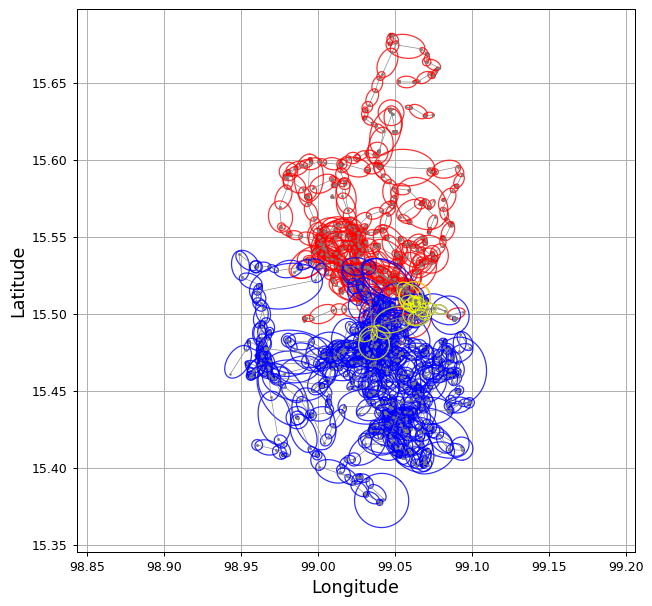

In [ ]:
throw_out_big_ellipses = True #@param {type:"boolean"}

ellipsecollection= [
                    ellipses_within_time_range_animal1,
                    ellipses_within_time_range_animal2,
                    ellipses_that_intersect_within_time_range_set]
import random
color1='#ff0000'#"#3ABA36" #green #
color2='#0000ff'#"#ff0000" #red %"#005EFF" #blue #" 
interaction_color="#f2ff00" #yellow 

fig = plt.figure(1, figsize=(8,8), dpi=90)
#ax = fig.add_subplot(111)

for collection in ellipsecollection: 
  if collection == ellipses_that_intersect_within_time_range_set:
    colorpicked= interaction_color
  if collection == ellipses_within_time_range_animal1:
    colorpicked= color1
  if collection == ellipses_within_time_range_animal2:
    colorpicked= color2
    
  for item in collection:
    if throw_out_big_ellipses==True:
      if item.el[0].length>max_val:
        #print('throwing out')
        continue
    el_shape = item.el[0]
    #print(el_shape)
    x,y= el_shape.xy
    #ax = fig.add_subplot(111)
    plt.plot(y,x, color=colorpicked, alpha=0.8,
        linewidth=1, solid_capstyle='round')

    #PLOT THE POINTS USED TO MAKE THE ELLIPSES, TOO
    lat1=item.lat
    lon1=item.lon
    lat2=item.lastlat
    lon2=item.lastlon
    #print(lat1,lon1,lat2,lon2)
    #plt.plot(lat1,lon1, 'r+', markersize=12, alpha=0.8, )
    #plt.plot(lat2,lon2, 'r+', markersize=12, alpha=0.8,  )
    plt.plot( [lon1,lon2], [lat1,lat2], 'o-', color="grey", linewidth=0.5, markersize=1)

plt.axis('equal')
plt.axis('on')
#plt.title('')   
plt.xlabel('Longitude', fontsize=14)  
plt.ylabel('Latitude', fontsize=14)   
plt.grid(True)
plt.savefig('tiger20080_20083_interaction.pdf')
plt.show()
